In [ ]:
# This file is part of the project's source code.
# Copyright (c) 2026 Daniel Monzon.
# Licensed under the MIT License. See the LICENSE file in the repository root.

# Damped Mass-Spring System 

### Abstract
___
This notebook presents a concise numerical study of the classical mass–spring–damper system governed by a second‑order ordinary differential equation. The governing dynamics are first expressed in their theoretical form and subsequently reformulated as a first‑order state‑space system suitable for numerical integration. The model parameters—mass, damping coefficient, and stiffness—are introduced explicitly to ensure clarity and reproducibility. The resulting initial‑value problem is solved using SciPy’s `solve_ivp` routine, and a uniformly spaced temporal grid is generated with NumPy to evaluate the system response. The displacement of the mass is then visualized using Matplotlib, providing a clear representation of the system’s temporal evolution. This workflow illustrates a standard and robust approach for simulating linear mechanical systems within a scientific computing environment.
___

### I) Objetives:

1. To derive the theoretical diferential equation governing the system.
2. To compute and plot a numerical solution using SciPy. 

### II) Theory:

I will consider the damped mass–spring system shown in Figure 1.

<figure style="text-align:center;">
  <img src="damped_mass_spring_system.jpg" alt="Descripción" style="width:75%;">
  <figcaption>Figure 1: Scheme for the damped mass-spring system.</figcaption>
</figure>

Assume that an external agent displaces the mass $m$ from its equilibrium position by a distance $x$. The forces exerted on $m$ are the elastic restoring force, which follows Hooke’s law and is given by $-kx$, and the viscous damping force, which is directly proportional to the velocity and given by $-b\dot{x}$, where $b$ is the damping coefficient. Therefore, by applying Newton’s second law, it follows that
$$\sum F_{x} = -kx - b\dot{x} = m\ddot{x},$$
$$\Longrightarrow \boxed{m\frac{dx}{dt^2} + b\frac{dx}{dt} + kx = 0}$$

### III) Evaluation of the System Dynamics using Python Code:

I will now proceed to show the code that allows to simulate the behaivor of this system.

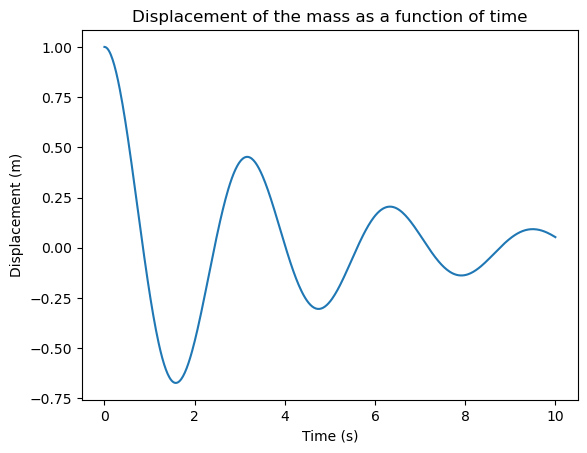

In [2]:
# Import the required libraries.
import numpy as np
from scipy.integrate import solve_ivp  # Function for numerical integrating a ODE.
import matplotlib.pyplot as plt

m, b, k = 1.0, 0.5, 4.0  # mass, damping coefficient, stiffness

def system(t, y):  # t: time variable (required by `solve_ivp`).
    x = y[0]  # First component of the state vector y (= position).
    v = y[1]  # Second component of the state vector y (= velocity).
    return [v, -(b/m)*v - (k/m)*x]  # The function `system` returns the time derivatives [dx/dt, dv/dt], i.e., 
                                    # velocity and acceleration, of the state vector.

t = np.linspace(0, 10, 500)  # Time grid: 500 equally spaced point between 0 and 10.
y0 = [1.0, 0.0]  # Initial state vector [x(0), v(0)].

sol = solve_ivp(system, [0, 10], y0, t_eval=t) # Numericall integration.
plt.plot(sol.t, sol.y[0])  # Plot the displacement, x(t), over time.
plt.title("Displacement of the mass as a function of time")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.show()


### IV) Bibliography

Zill, D. G., & Cullen, M.R. (2006). Advanced Engineering Mathematics (3rd. ed.). McGraw-Hill.